In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import powerlaw

In [3]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

In [4]:
Data_Internet = abrir_txt('netscience/as-22july06_edgelist.txt')
Data_Internet=[[col1,col2] for (col1,col2,col3) in Data_Internet]
Data_Y2H = abrir_txt('netscience/yeast_Y2H.txt')

Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)

Red_Internet=nx.Graph()
Red_Internet.add_edges_from(Data_Internet)

Red_Colaboraciones = nx.read_gml('netscience/netscience.gml')

KeyboardInterrupt: 

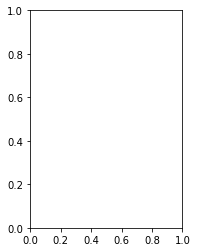

In [5]:
# plt.subplot(1,1,1)
# nx.draw(Red_Y2H)
# plt.subplot(1,2,2)
# nx.draw(Red_Internet)
# plt.subplot(1,3,3)
# nx.draw(Red_Colaboraciones)

## Problema 1

### Item A: Distribución de grado

In [6]:
def hacer_lista_grados(Red):
  lista_grados=[grado for (nodo,grado) in Red.degree()]
  return lista_grados

In [10]:
lista_grados_Y2H = hacer_lista_grados(Red_Y2H)
len(lista_grados_Y2H)

2018

In [27]:
def ploteo_general(red, bines):

    fig, ax = plt.subplots(2,2, sharey=False)

    ax[0,0].hist(red,bines)
    ax[0,0].set_xscale('linear'); ax[0,0].set_yscale('linear')
    ax[0,0].set_xlabel('log'); ax[0,0].set_ylabel('linear')

    ax[0,1].hist(red,bines)
    ax[0,1].set_xscale('log'); ax[0,1].set_yscale('linear')
    ax[0,1].set_xlabel('log'); ax[0,1].set_ylabel('linear')

    ax[1,0].hist(red,bines)
    ax[1,0].set_xscale('linear'); ax[1,0].set_yscale('log')
    ax[1,0].set_xlabel('linear'); ax[1,0].set_ylabel('log')

    ax[1,1].hist(red,bines)
    ax[1,1].set_xscale('log'); ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel('log');ax[1,1].set_ylabel('log')
    fig.tight_layout()

In [30]:
def graficos_log(red, bin_fino):
    lista_grados = hacer_lista_grados(red)
    bines_lineal = np.linspace(0,np.max(lista_grados),bin_fino)
    bines_log = np.logspace(0,np.log10(np.max(lista_grados)),bin_fino)

    ploteo_general(lista_grados, bines_lineal)
    ploteo_general(lista_grados, bines_log)
        

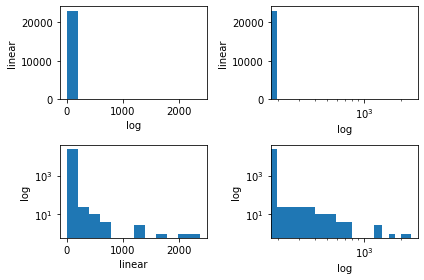

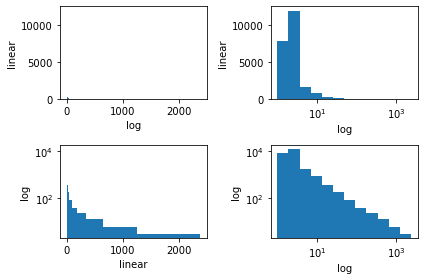

In [32]:
graficos_log(Red_Internet, 13)

In [43]:
def ajuste(red, bin_fino):
    
    lista_grados = hacer_lista_grados(red)
    bines=np.logspace(0,np.log10(np.max(lista_grados_Y2H)),bin_fino)
    results = powerlaw.Fit(lista_grados)

    Kmin = results.power_law.xmin #este sería nuestro Kmin
    gamma = results.power_law.alpha #este sería nuestro gamma
    print('Kmin = '+str(Kmin))
    print('gamma = '+str(gamma))

    plt.figure()
    array = np.array(lista_grados)

    hist = plt.hist(lista_grados,bines)
    hist = plt.hist(array[array>Kmin],bines)
    plt.xscale('log');plt.yscale('log')
    
    x = np.zeros(len(hist[1])-1)
    for i in range(len(x)):
        x[i] = (hist[1][i+1]+hist[1][i])/2

    plt.figure()
    hist = plt.hist(array[array>Kmin],bines,density = True,color='orange')
    plt.xscale('log');plt.yscale('log')
    plt.plot(x[x>Kmin],(gamma-1)*Kmin**(gamma-1)*x[x>Kmin]**(-gamma),'r')

Calculating best minimal value for power law fit
Kmin = 7.0ess: 96%
gamma = 3.1810099549828843


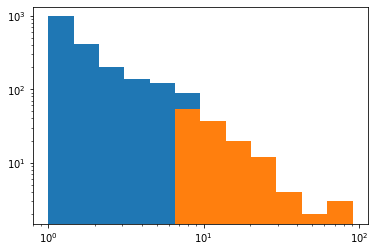

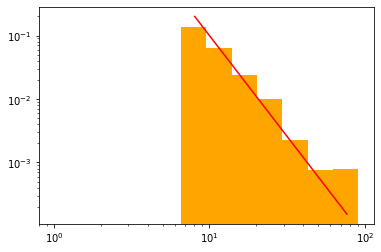

In [44]:
ajuste(Red_Y2H, 13)

Me queda chequear a que combinacion de log-lineal aplico esto y repetir cada las otras 3 redes.
Con esto discutir los resultados y listo el ejercicio 1